### 1. Read a CSV file, assume there are two fields, Name and Mark, with around 10 rows filled. Calculate the Mean, Variance and Standard deviation, write it to the CSV and save it. Also plot a graph of these values and mark the mean and SD on it. [Don’t use any standard library functions for SD/mean etc. Also, you can’t use Pandas]

In [ ]:
import csv
import math
import matplotlib.pyplot as plt

# Read CSV file
filename = 'data.csv'
rows = []
with open(filename, 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        rows.append(row)

# Calculate mean
marks = [int(row['Mark']) for row in rows]
mean = sum(marks) / len(marks)

# Calculate variance
variance = sum((x - mean) ** 2 for x in marks) / len(marks)

# Calculate standard deviation
std_dev = math.sqrt(variance)

# Write results to CSV file
output_filename = 'stats.csv'
with open(output_filename, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Statistic', 'Value'])
    writer.writerow(['Mean', mean])
    writer.writerow(['Variance', variance])
    writer.writerow(['Standard Deviation', std_dev])

# Plot graph with mean and SD
plt.hist(marks, bins=10)
plt.axvline(x=mean, color='r', linestyle='--', label='Mean')
plt.axvline(x=mean-std_dev, color='g', linestyle='--', label='SD')
plt.axvline(x=mean+std_dev, color='g', linestyle='--')
plt.legend()
plt.show()

### 2. Get a number, Make the 2 MSBs one. Print the result – both as decimal and binary

In [3]:
# Get input number
num = int(input("Enter a number: "))

# Make 2 MSBs one
result = num | 0b11000000

# Print result in decimal and binary
print("Afrer making 2 MSBs one:-")
print(f"Result in decimal: {result}")
print(f"Result in binary:  {bin(result)}")

Enter a number: 12
Afrer making 2 MSBs one:-
Result in decimal: 204
Result in binary:  0b11001100


### 3. A shopkeeper want to give his clients the balance amount with minimum number of notes.  Write a program to find out the notes and their counts, so that the total number of notes is  minimum. Eg: If he has entered 1339, the system should display

In [5]:
# Get input balance amount
amount = int(input("Enter balance amount: "))

# Define list of available notes and their values
notes = [2000, 500, 200, 100, 50, 20, 10, 5, 2, 1]

# Initialize list of note counts with zeros
note_counts = [0] * len(notes)

# Loop through notes and update note counts
for i, note in enumerate(notes):
    while amount >= note:
        note_counts[i] += 1
        amount -= note

# Print note counts
print("Minimum number of notes:")
for note, count in zip(notes, note_counts):
    if count > 0:
        print(f"{note}: {count}")


Enter balance amount: 155
Minimum number of notes:
100: 1
50: 1
5: 1


### 4. Caesar cipher is a method to encrypt (make a secret code) a string. It is achieved by advancing each digit n places. Write a program to read a text file, get the string and encrypt it first using Caesar and then XORing with a salt and write it back to 
<filename>_enc.txt.
 Eg: abcd
 places to shift: 3
 Encrypted Caesar String: defg
 Now encrypt it with a salt lets say ‘abc’

In [10]:
# Define function to encrypt string using Caesar cipher
def caesar_cipher(text, shift):
    encrypted_text = ""
    for char in text:
        if char.isalpha():
            # Shift character by specified amount
            shifted_char = chr((ord(char) - 65 + shift) % 26 + 65)
            encrypted_text += shifted_char
        else:
            encrypted_text += char
    return encrypted_text

# Define function to encrypt string using XOR with a salt
def xor_cipher(text, salt):
    encrypted_text = ""
    for i, char in enumerate(text):
        encrypted_char = chr(ord(char) ^ ord(salt[i % len(salt)]))
        encrypted_text += encrypted_char
    return encrypted_text

# Get input filename and read file contents
filename = input("Enter filename: ")
with open(filename, "r", encoding="utf-8") as file:
    plaintext = file.read()

# Get input shift and encrypt using Caesar cipher
shift = int(input("Enter shift: "))
caesar_text = caesar_cipher(plaintext, shift)

# Get input salt and encrypt using XOR cipher
salt = input("Enter salt: ")
xor_text = xor_cipher(caesar_text, salt)

# Write encrypted text to output file
output_filename = filename.split(".")[0] + "_enc.txt"
with open(output_filename, "w", encoding="utf-8") as file:
    file.write(xor_text)

print(f"Encrypted text written to {output_filename}")

Enter filename: blockchain-in-fintech.txt
Enter shift: 3
Enter salt: abc
Encrypted text written to blockchain-in-fintech_enc.txt


### 5. Calculate Cos (x) using Maclaurin Series and plot the series with matplotlib You should implement a package mymath and import that. Don’t use any of the prebuilt libraries for finding power or factorial.

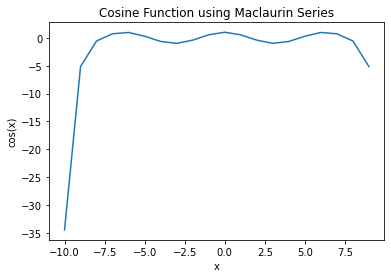

In [4]:
import matplotlib.pyplot as plt

def power(x, n):
    """
    Calculates x^n using recursion
    """
    if n == 0:
        return 1
    elif n % 2 == 0:
        y = power(x, n//2)
        return y*y
    else:
        y = power(x, (n-1)//2)
        return x*y*y

def factorial(n):
    """
    Calculates n! using recursion
    """
    if n == 0 or n == 1:
        return 1
    else:
        return n * factorial(n-1)

def cos(x):
    """
    Calculates cos(x) using Maclaurin series
    """
    result = 1
    sign = -1
    for i in range(2, 20, 2):
        term = power(x, i) / factorial(i)
        result += sign * term
        sign *= -1
    return result

# Calculate cos(x) using Maclaurin series
x_values = range(-10, 10)
cos_values = [cos(x) for x in x_values]

# Plot the series using matplotlib
plt.plot(x_values, cos_values)
plt.title("Cosine Function using Maclaurin Series")
plt.xlabel("x")
plt.ylabel("cos(x)")
plt.show()


### 6. Write a program to compare two JSONS which are structurally similar. The output should be another JSON which contains the tags that has different values. You may expect the JSONS can have nested structures.

In [5]:
import json

def compare_json(json1, json2):
    """
    Compares two JSONs and returns another JSON containing the tags that have different values
    """
    result = {}
    for key in json1:
        if key not in json2:
            result[key] = "Only in 1"
        elif isinstance(json1[key], dict) and isinstance(json2[key], dict):
            sub_result = compare_json(json1[key], json2[key])
            if sub_result != {}:
                result[key] = sub_result
        elif json1[key] != json2[key]:
            result[key] = {"json1": json1[key], "json2": json2[key]}
    for key in json2:
        if key not in json1:
            result[key] = "Only in 2"
    return result

# Sample JSONs for testing
json1 = {
    "x": 10.1,
    "y": 20,
    "name": "Anu",
    "dob": "2010-10-10"
}
json2 = {
    "x": 10,
    "y": 20,
    "name": "Ani",
    "dob": "2010-10-11",
    "z": 100
}

# Compare the JSONs and print the result
result = compare_json(json1, json2)
print(json.dumps(result, indent=4))

{
    "x": {
        "json1": 10.1,
        "json2": 10
    },
    "name": {
        "json1": "Anu",
        "json2": "Ani"
    },
    "dob": {
        "json1": "2010-10-10",
        "json2": "2010-10-11"
    },
    "z": "Only in 2"
}
